# Q2_KNN_Glass

In [1]:
#Import Libraries
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Import Dataset
dataframe = read_csv("glass.csv")

In [3]:
dataframe.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


# EDA

In [4]:
dataframe.shape

(214, 10)

In [5]:
dataframe.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
dataframe.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Visualizations

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([[214.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0., 211.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [214.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [214.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 214.],
        [214.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  9., 204.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [214.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [214.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [214.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 0.   ,  7.541, 15.082, 22.623, 30.164, 37.705, 45.246, 52.787,
        60.328, 67.869, 75.41 ]),
 <a list of 10 BarContainer objects>)

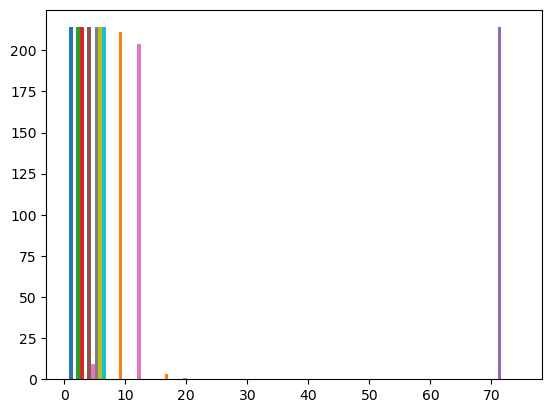

In [9]:
plt.hist(dataframe)

/Users/snehakoneru/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


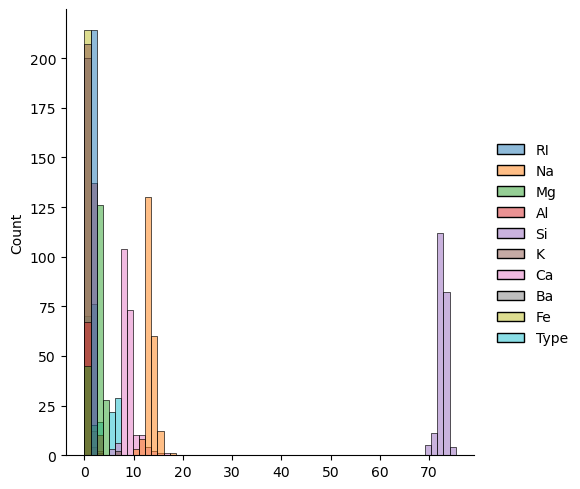

In [10]:
sns.displot(dataframe)

<Axes: ylabel='count'>

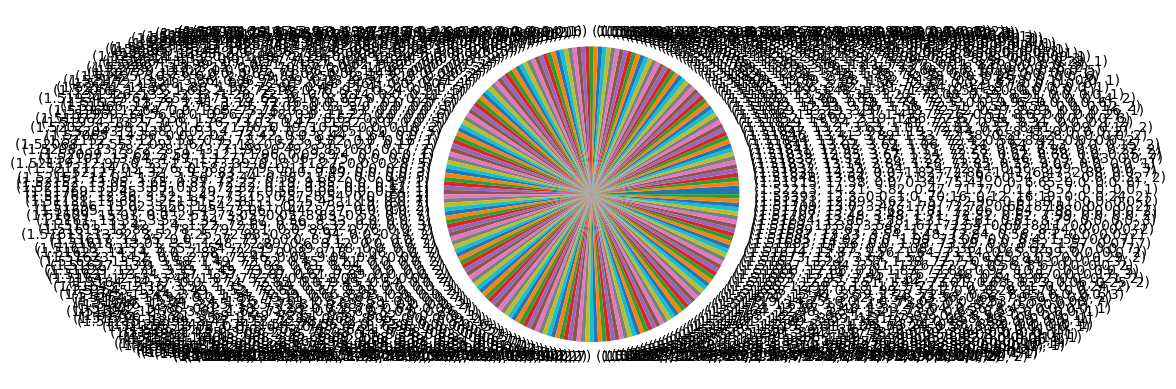

In [11]:
dataframe.value_counts().plot(kind="pie")

/Users/snehakoneru/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


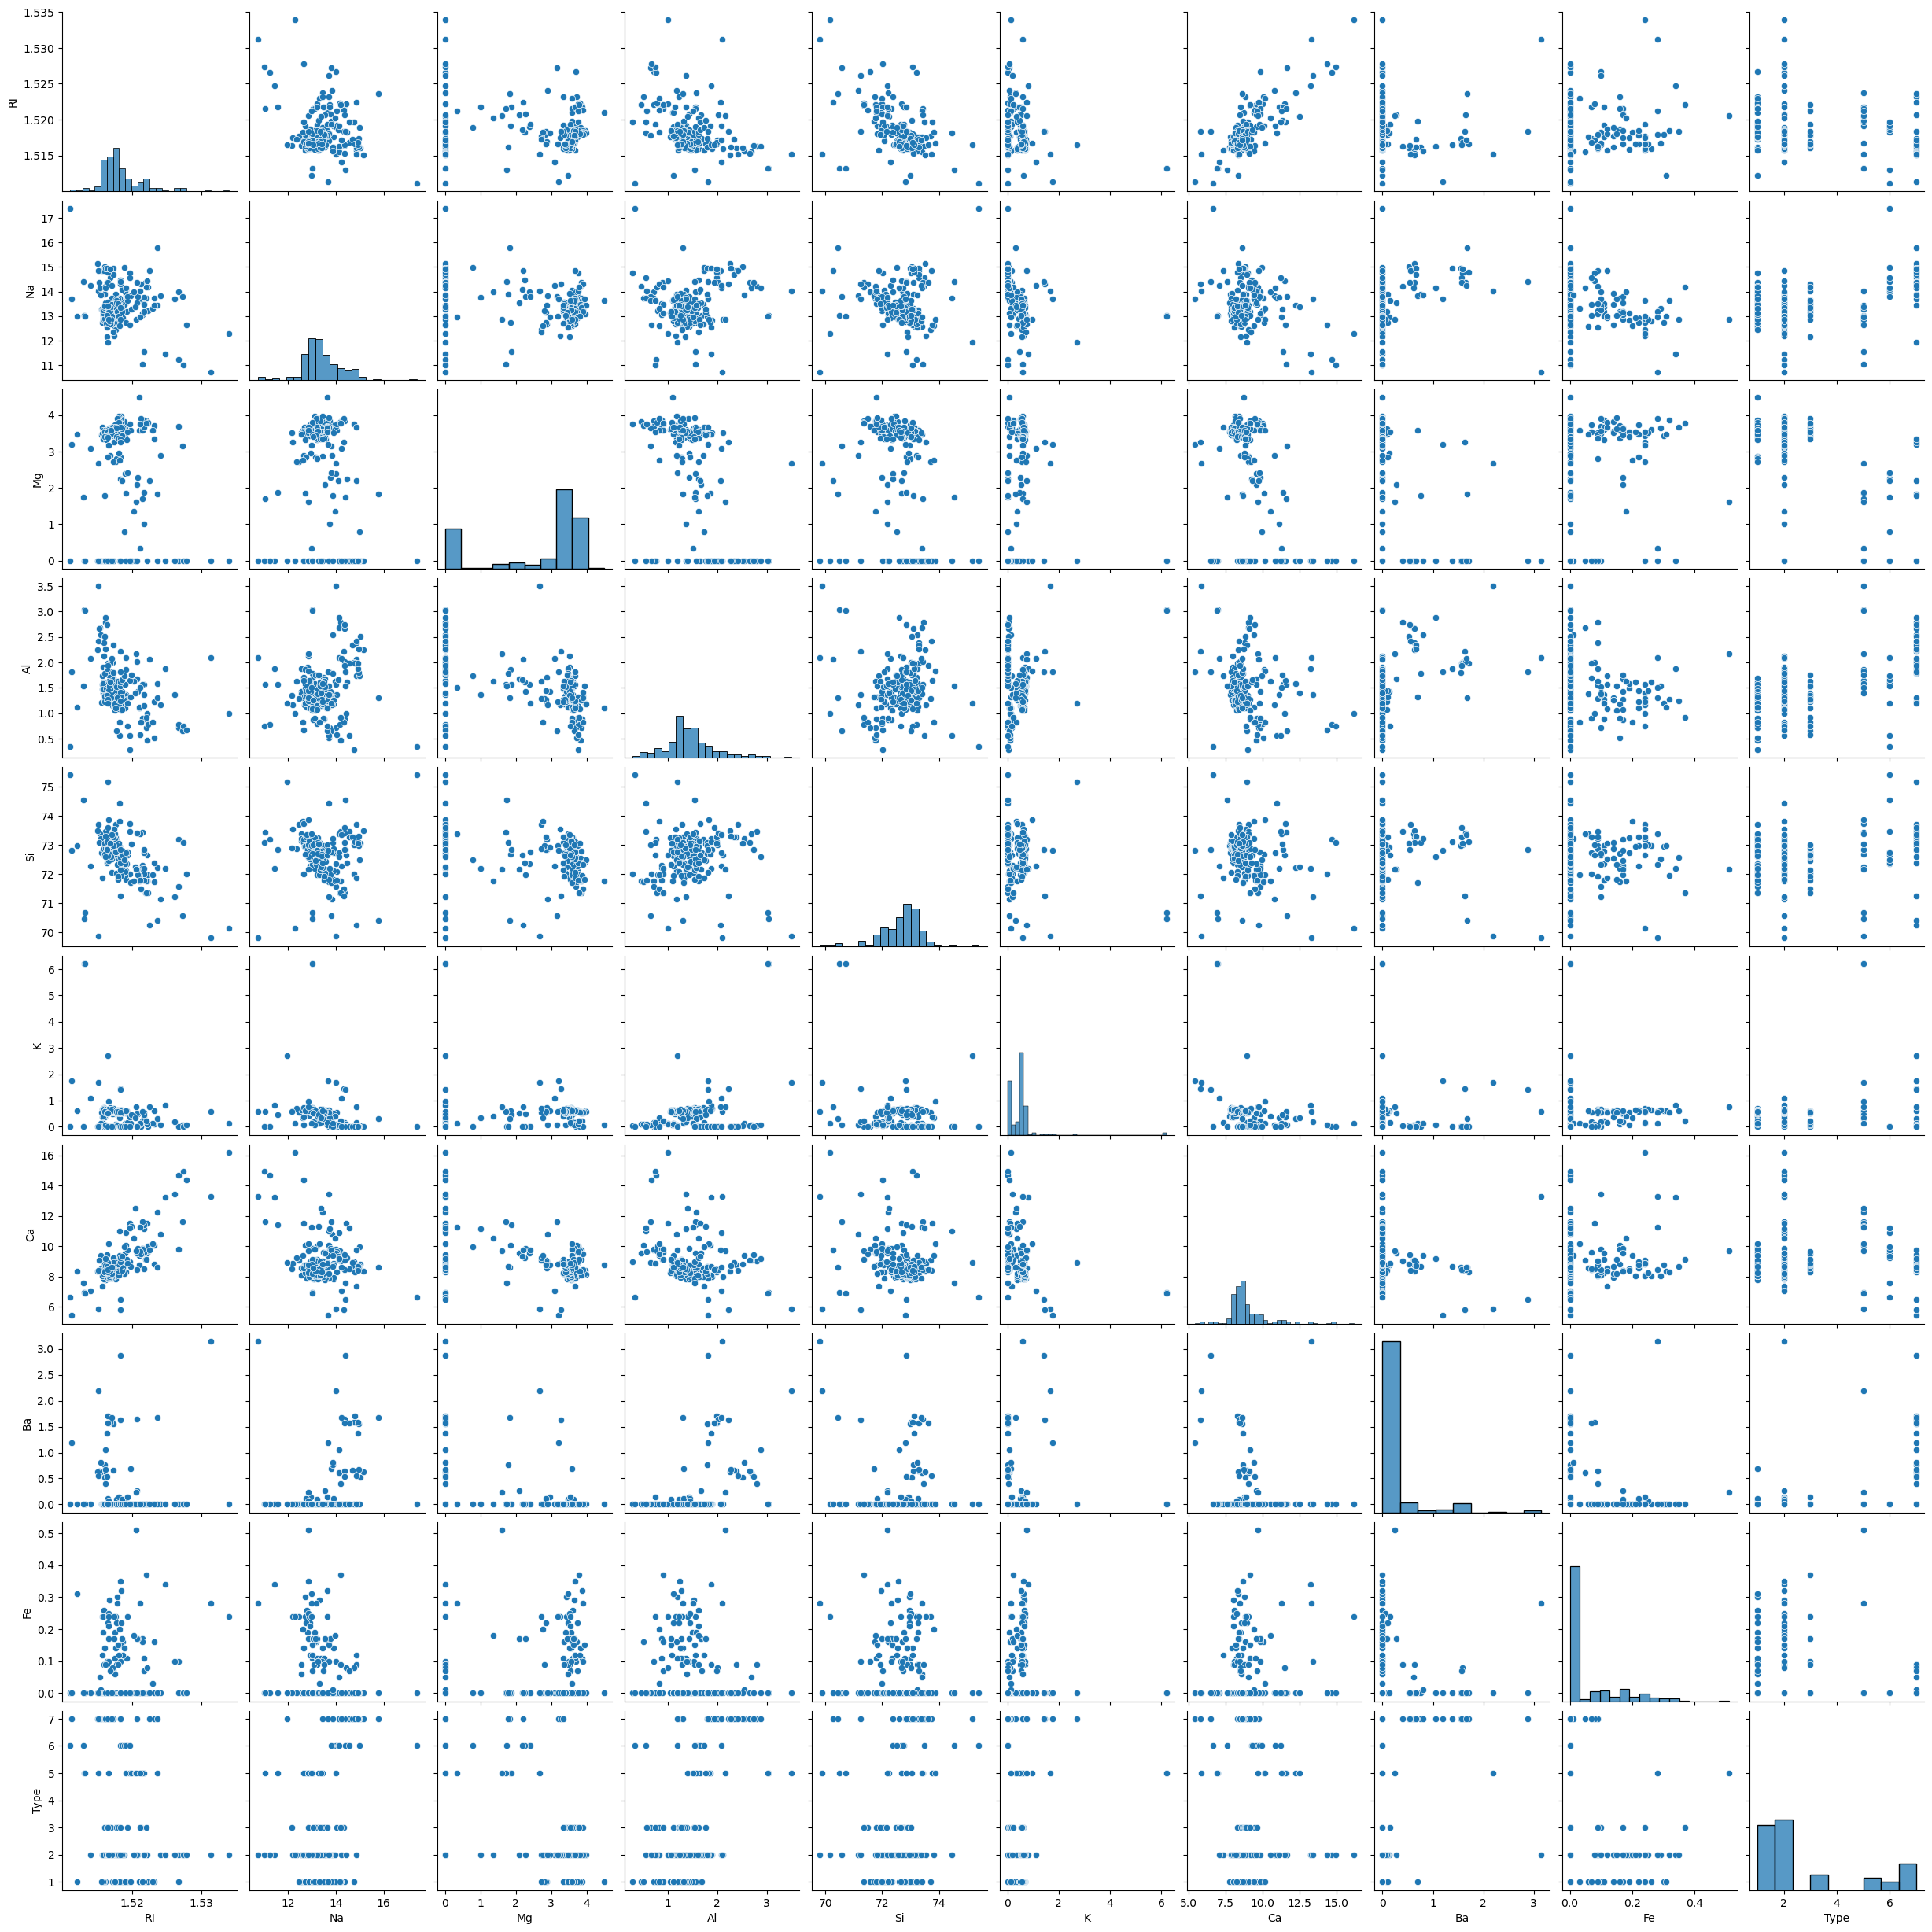

In [12]:
sns.pairplot(dataframe)

# Preprocessing

In [13]:
array = dataframe.values
X = array[:, 0:9]
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [14]:
Y = array[:, 9]
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [15]:
kfold = KFold(n_splits=10)

In [16]:
model = KNeighborsClassifier(n_neighbors=15)
results = cross_val_score(model, X, Y, cv=kfold)

In [17]:
print(results.mean())

0.43787878787878787


# Grid search for Algorithm Tuning

In [18]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
n_neighbors1 = numpy.array(range(1,80))
param_grid = dict(n_neighbors=n_neighbors1)

In [20]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])})

In [21]:
print(grid.best_score_)

0.640531561461794


In [22]:
print(grid.best_params_)

{'n_neighbors': 1}


# Visualising the CV results

In [23]:
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
# choose k between 1 to 80
k_range = range(1, 80)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())

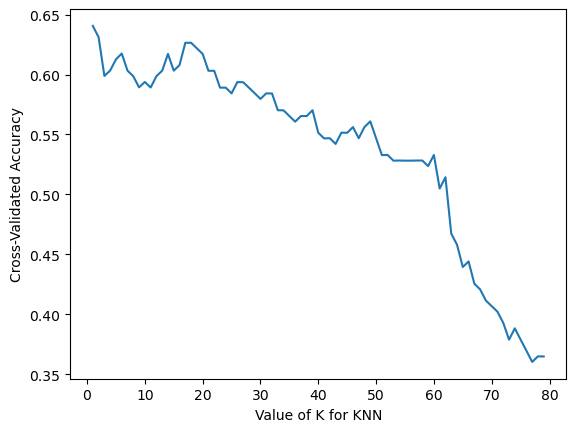

In [24]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [26]:
#load data
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
# value count for glass types
df.Type.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

# Data exploration and Visualization

<Axes: >

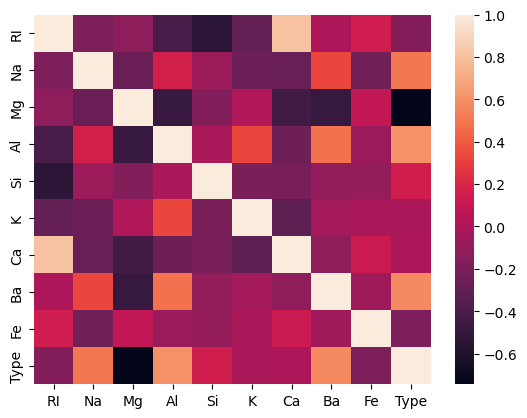

In [28]:
#Correlation matrix
cor = df.corr()
sns.heatmap(cor)

We can notice that Ca and K values don't affect Type that much.

Also Ca and RI are highly correlated, this means using only RI is enough.

So we can go ahead and drop Ca, and also K.(performed later)

# Scatter plot of two features, and pairwise plot

/Users/snehakoneru/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


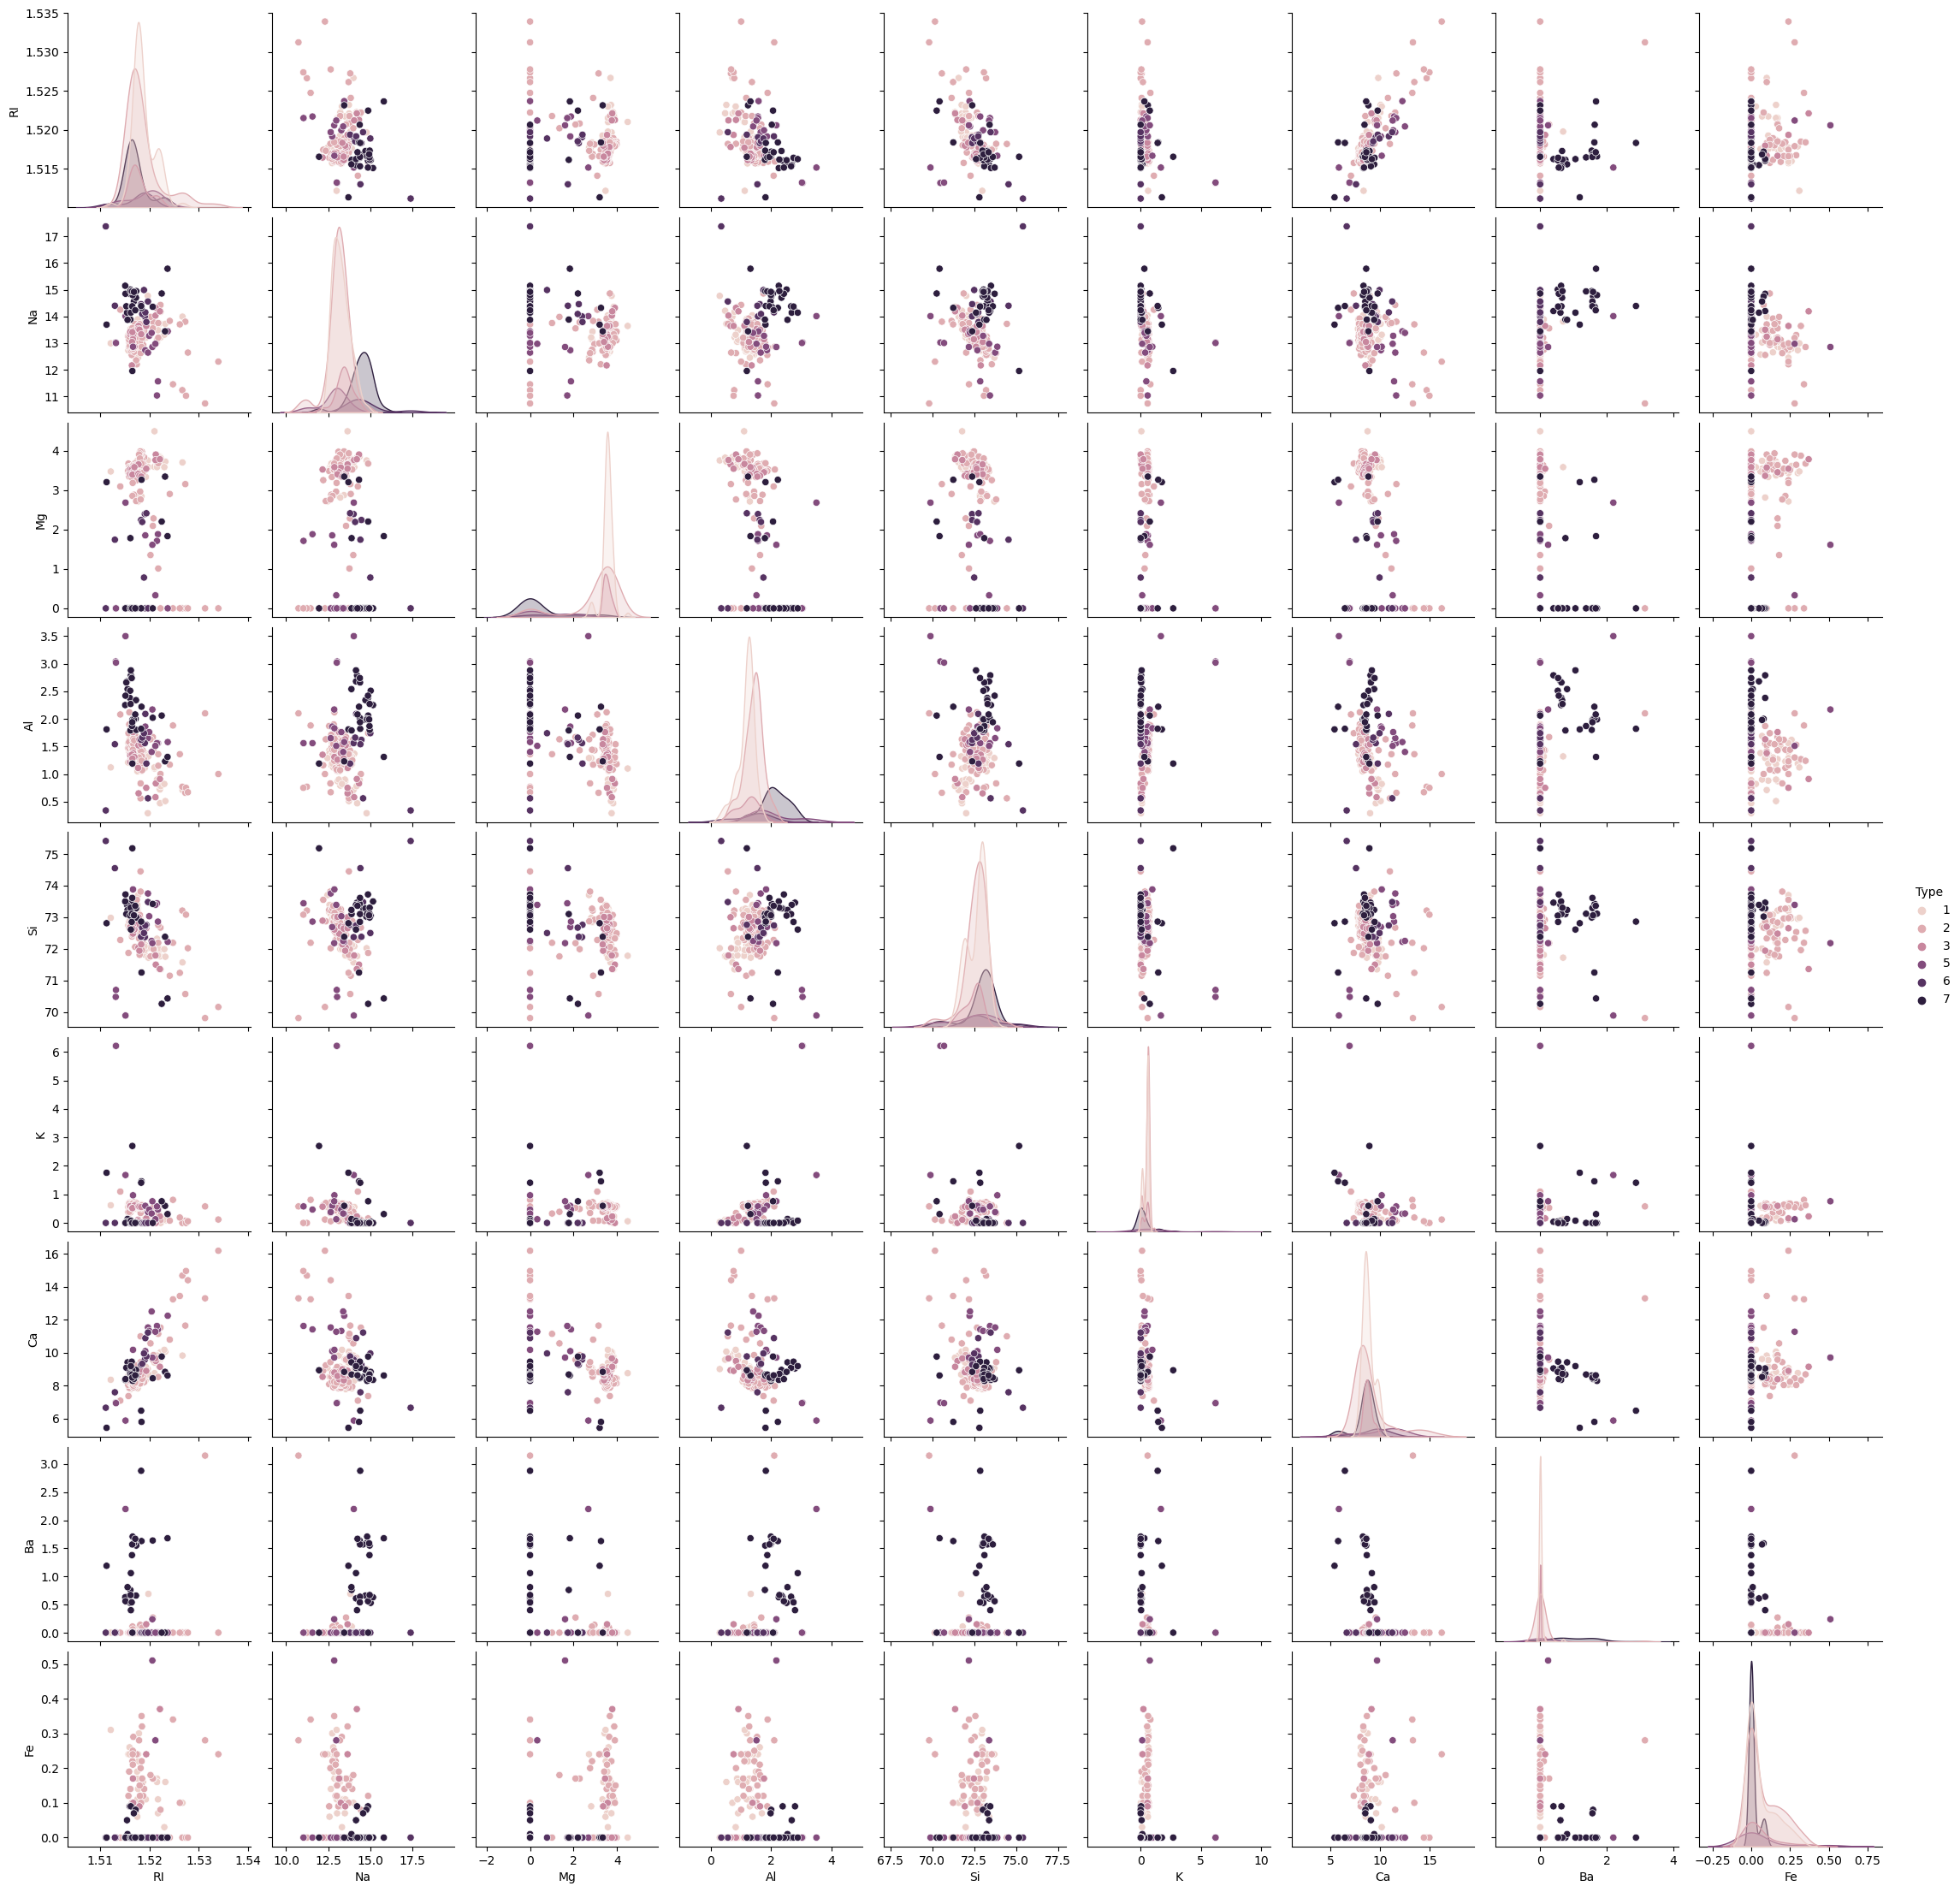

In [30]:
#pairwise plot of all the features
sns.pairplot(df,hue='Type')
plt.show()

The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types

# Feature Scaling

Scaling is necessary for distance-based algorithms such as KNN. This is to avoid higher weightage being assigned to data with a higher magnitude.

Using standard scaler we can scale down to unit variance.

Formula:

z = (x - u) / s

where x -> value, u -> mean, s -> standard deviation

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(df.drop('Type',axis=1))


StandardScaler()

In [35]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [36]:
#perform transformation
scaled_features = scaler.transform(df.drop('Type',axis=1))
scaled_features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [37]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


# Applying KNN

1.Drop features that are not required.
2.Use random state while splitting the data to ensure reproducibility and consistency.
3.Experiment with distance metrics - Euclidean, manhattan.

In [38]:
dff = df_feat.drop(['Ca','K'],axis=1) #Removing features - Ca and K 
X_train,X_test,y_train,y_test  = train_test_split(dff,df['Type'],test_size=0.3,random_state=45) 
#setting random state ensures split is same eveytime, so that the results are comparable


In [39]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [41]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [42]:
y_pred = knn.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.90      0.78        20
           2       0.85      0.65      0.74        26
           3       0.00      0.00      0.00         3
           5       0.25      1.00      0.40         1
           6       0.50      0.50      0.50         2
           7       1.00      0.85      0.92        13

    accuracy                           0.74        65
   macro avg       0.55      0.65      0.56        65
weighted avg       0.77      0.74      0.74        65



In [44]:
accuracy_score(y_test,y_pred)

0.7384615384615385

With this setup, We found the accuracy to be 73.84%

# Finding the best K value

We can do this either -
1.by plotting Accuracy
or 2.by plotting the error rate
Note that plotting both is not required, however both are plottted here to show as an example.

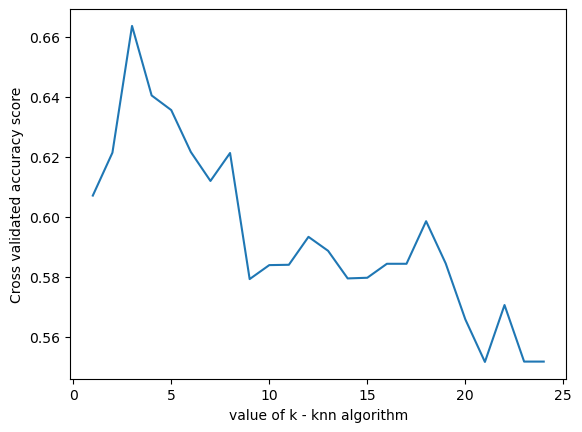

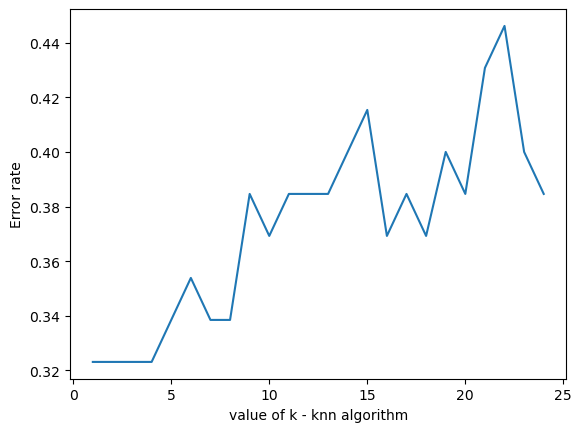

In [45]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,dff,df['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

we can see that k=4 produces the most accurate results

# Findings

1.Manhattan distance produced better results (improved accuracy - more than 5%)
2.Applying feature scaling improved accuracy by almost 5%.
3.The best k value was found to be 4.
4.Dropping ‘Ca’ produced better results by a bit, ‘K’ feature did not affect results in any way.
5.Also, we noticed that RI and Ca are highly correlated, this makes sense as it was found that the Refractive index of glass was found to increase with the increase in Cao.

# Further Improvements

We can see that the model can be improved further so we get better accuracy. Some suggestions -

1.Using KFold Cross-validation
2.Try different algorithms to find the best one for this problem - (SVM, Random forest, etc)